![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


   # **Cortex Game: Round1--Amount**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [1]:
my_folder = "/content/drive/MyDrive/S7/HEC"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/S7/HEC


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [2]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [3]:
!pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 7.5 MB/s 
  Created wheel for saspy: filename=saspy-4.4.0-py3-none-any.whl size=9937189 sha256=7fbff5ef74b3a64810288090a561ef25ab4cfe24ff7f5e2890ce831f7d6f9f13
  Stored in directory: /root/.cache/pip/wheels/78/ce/27/57cfb223c6e6232856fe149e532b99faeaf94b8d47bc273ccb
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Writing sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [104]:
%%writefile .authinfo
oda user A01570318@tec.mx password Shiromia0309@

Overwriting .authinfo


Copy this file to home

In [105]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [106]:
import saspy
sas_session = saspy.SASsession(cfgfile="/content/drive/MyDrive/S7/HEC/sascfg_personal.py")
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 1095



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/S7/HEC/sascfg_personal.py
WORK Path             = /saswork/SAS_work5DA500005802_odaws01-usw2-2.oda.sas.com/SAS_work260F00005802_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.0
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 22530


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [6]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                    Thursday, December  1, 2022 04:36:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                    Thursday, December  1, 2022 04:36:00 PM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

UsageError: Cell magic `%%SAS` not found.


## Transform cloud SAS dataset to Python dataframe (pandas)


> **For reference**:

> 1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)

> 2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)


In [46]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd1',
libref='cortex'
)

In [8]:
data1

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear
0,2000001.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0,0.0,0.0
1,2000002.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2000003.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,2000004.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,2000005.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2999996.0,SCHUBERT,FRANCES,1.0,29.0,15100.0,High School,Suburban,8.0,3.0,2.0,5.0,1.0,5.0,20.0,20.0,20.0,0.0,0.0
999996,2999997.0,LUGGE,MARY,1.0,22.0,7000.0,High School,Suburban,10.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
999997,2999998.0,ROY,REGINALD,0.0,17.0,1000.0,High School,City,10.0,1.0,1.0,1.0,1.0,1.0,20.0,20.0,20.0,0.0,0.0
999998,2999999.0,LIBERTI,PAMELA,1.0,32.0,43900.0,University / College,Rural,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [9]:
data2

,ID,GaveThisYear,AmtThisYear
0,2000001.0,0.0,0.0
1,2000002.0,0.0,0.0
2,2000003.0,0.0,0.0
3,2000004.0,0.0,0.0
4,2000005.0,0.0,0.0
...,...,...,...
999995,2999996.0,0.0,0.0
999996,2999997.0,0.0,0.0
999997,2999998.0,0.0,0.0
999998,2999999.0,0.0,0.0


## Merge the Data

In [47]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
data_merge.sample(5)

#data_merge.head()


,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
348154,2348155.0,GRANT,THOMAS,0.0,22.0,4600.0,University / College,Downtown,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,15.0,1.0,10.0
64780,2064781.0,BEDWELL,KATHLEEN,1.0,74.0,34100.0,University / College,Suburban,6.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
675312,2675313.0,SMITH,DIXIE,1.0,58.0,64300.0,University / College,City,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
927998,2927999.0,MATUTE,FRANK,0.0,62.0,0.0,High School,Downtown,7.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
514818,2514819.0,CARROLL,JANICE,1.0,37.0,79100.0,University / College,Downtown,8.0,1.0,...,7.0,1.0,7.0,10.0,10.0,10.0,0.0,0.0,1.0,30.0


In [12]:
data_merge.describe()

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,336334.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.500000e+06,0.516936,46.366170,65531.654000,4.582967,0.561413,0.560556,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.122101,7.673015,0.122232,7.741080
std,2.886753e+05,0.499713,18.945324,61051.122343,3.325844,0.996803,1.054027,2.120722,1.052090,2.588119,303.760477,150.249476,283.581066,0.327403,82.224854,0.327554,83.110552
min,2.000001e+06,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,2.250001e+06,0.000000,30.000000,20700.000000,2.000000,0.000000,0.000000,1.000000,1.000000,2.000000,20.000000,15.000000,20.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500000e+06,1.000000,46.000000,44000.000000,4.000000,0.000000,0.000000,2.000000,1.000000,4.000000,40.000000,20.000000,30.000000,0.000000,0.000000,0.000000,0.000000
75%,2.750000e+06,1.000000,61.000000,91200.000000,7.000000,1.000000,1.000000,4.000000,2.000000,6.000000,90.000000,30.000000,75.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000e+06,1.000000,90.000000,250000.000000,10.000000,10.000000,16.000000,10.000000,10.000000,10.000000,15150.000000,10000.000000,10000.000000,1.000000,10000.000000,1.000000,10000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0db3c9b80>,
      dtype=object)

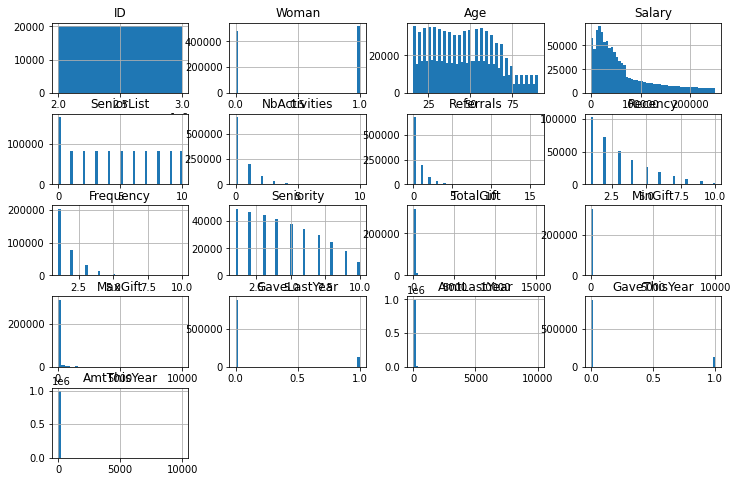

In [16]:
import matplotlib.pyplot as plt
data_merge.hist(bins=50, figsize=(12,8))

Text(0.5, 1.0, 'Correlation matrix for the donations dataset')

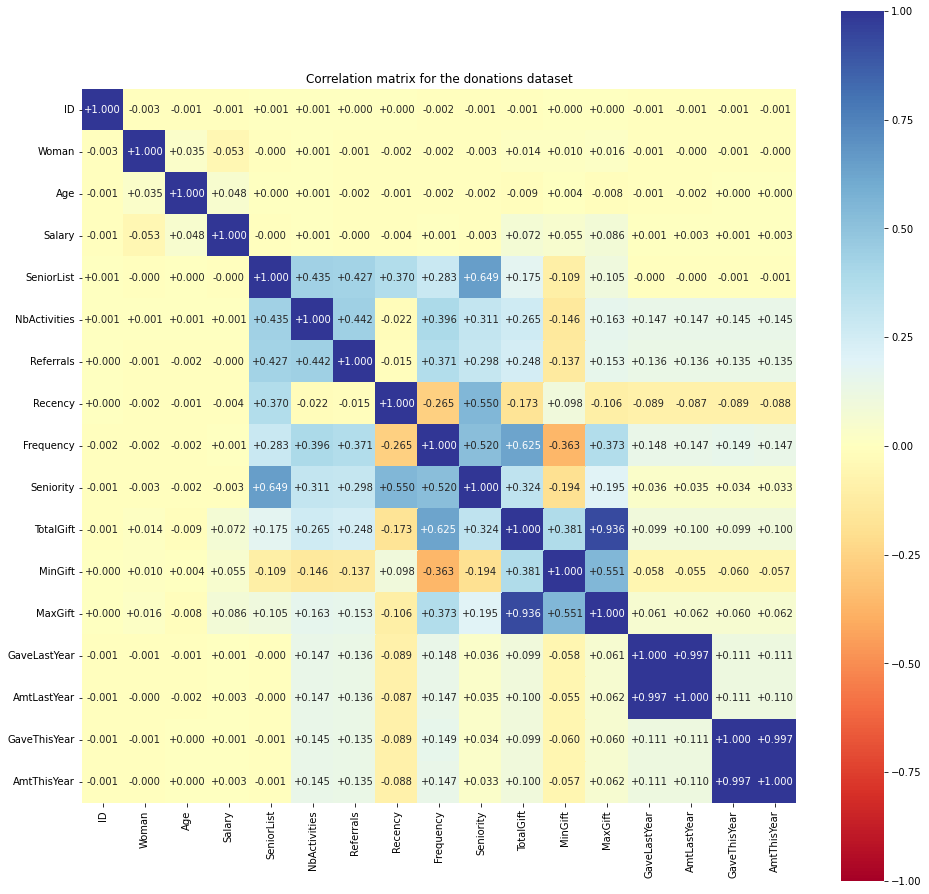

In [20]:
import seaborn as sns

plt.figure(figsize=(16,16))
sns.heatmap(data_merge.corr(method='spearman'), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the donations dataset")

Might be possible min gift is inversely correlated to gave last year.
Important columns are Age, Salary, NbActivities, Referrals, Frequency, Seniority, TotalGift, MinGift, MaxGift, GavesLastYear, AmtLastYear, Recency

In [23]:
analysis_df = pd.crosstab(data_merge.GaveThisYear,data_merge.Age)
analysis_df.head()

Age,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,...,81.0,82.0,83.0,84.0,85.0,86.0,87.0,88.0,89.0,90.0
GaveThisYear,,,,,,,,,,,,,,,,,,,,,
0.0,15347,15710,13346,13392,15116,15022,14983,15012,15180,15533,...,4228,4398,4267,4175,4210,4066,4328,4195,4193,4332
1.0,2131,2173,1871,1907,2145,2082,2055,2134,2024,2139,...,613,621,582,593,594,600,574,552,581,624


<Figure size 1152x1152 with 0 Axes>

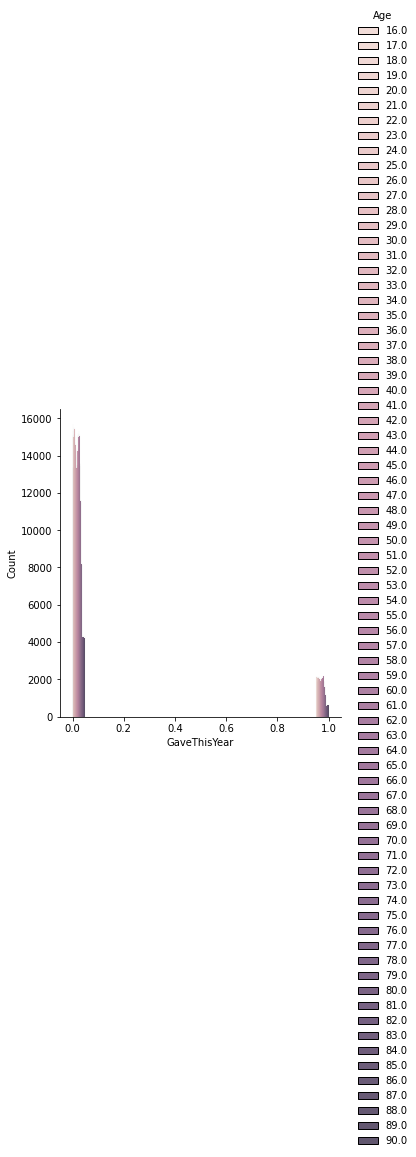

In [25]:
plt.figure(figsize=(16,16))
sns.displot(data_merge, x="GaveThisYear", hue="Age", multiple="dodge")

In [22]:
analysis_df = pd.crosstab(data_merge.GaveThisYear,data_merge.Salary)
analysis_df.head()

Salary,0.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,...,249100.0,249200.0,249300.0,249400.0,249500.0,249600.0,249700.0,249800.0,249900.0,250000.0
GaveThisYear,,,,,,,,,,,,,,,,,,,,,
0.0,508,1013,1038,1023,996,998,1043,998,992,959,...,92,102,75,69,86,97,88,89,94,46
1.0,68,149,151,121,130,157,151,148,143,153,...,15,16,15,14,14,16,14,14,10,6


In [26]:
data_merge["NbActivities"]

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
999995    3.0
999996    0.0
999997    1.0
999998    0.0
999999    0.0
Name: NbActivities, Length: 1000000, dtype: float64

For sure include this variable

In [27]:
analysis_df = pd.crosstab(data_merge.GaveThisYear,data_merge.NbActivities)
analysis_df.head()

NbActivities,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GaveThisYear,,,,,,,,,,,
0.0,601702,175143,62776,23785,9039,3521,1249,420,106,23,4
1.0,61340,28698,15652,8365,4377,2212,990,381,163,43,11


In [28]:
analysis_df = pd.crosstab(data_merge.AmtThisYear,data_merge.NbActivities)
analysis_df.head()

NbActivities,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
AmtThisYear,,,,,,,,,,,
0.0,601702,175143,62776,23785,9039,3521,1249,420,106,23,4
10.0,9469,4447,2404,1260,718,336,172,48,34,10,4
15.0,1137,502,257,136,75,18,17,4,3,0,0
20.0,17180,8097,4522,2459,1330,711,303,138,59,10,3
25.0,7010,3277,1722,965,484,210,107,42,18,3,1


In [29]:
analysis_df = pd.crosstab(data_merge.GaveThisYear,data_merge.Referrals)
analysis_df.head()

Referrals,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
GaveThisYear,,,,,,,,,,,,,,,,,
0.0,612618,164417,59833,23689,9802,4229,1814,789,354,134,48,26,10,1,2,1,1
1.0,64584,26474,14474,7868,4158,2305,1189,596,307,157,70,28,10,6,4,2,0


<Figure size 1152x1152 with 0 Axes>

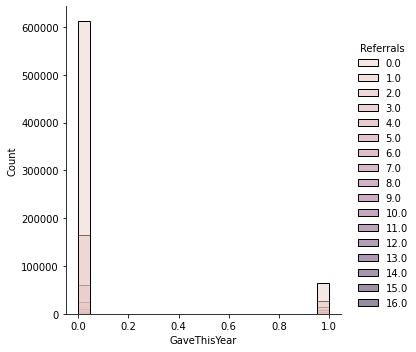

In [31]:
plt.figure(figsize=(16,16))
sns.displot(data_merge, x="GaveThisYear", hue="Referrals")

In [32]:
analysis_df = pd.crosstab(data_merge.GaveThisYear,data_merge.Frequency)
analysis_df.head()

Frequency,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GaveThisYear,,,,,,,,,,
0.0,174793,62663,23680,9176,3496,1268,407,112,26,5
1.0,28490,15743,8354,4324,2279,950,385,132,41,10


<Figure size 1152x1152 with 0 Axes>

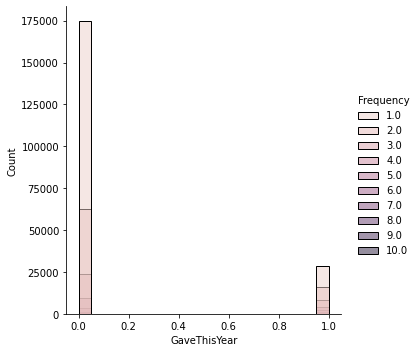

In [33]:
plt.figure(figsize=(16,16))
sns.displot(data_merge, x="GaveThisYear", hue="Frequency")

In [34]:
data_merge.isna().sum().sum()

3982023

In [48]:
data_merge.isna().sum()

ID                   0
LastName            23
FirstName            4
Woman                0
Age                  0
Salary               0
Education            0
City                 0
SeniorList           0
NbActivities         0
Referrals            0
Recency         663666
Frequency       663666
Seniority       663666
TotalGift       663666
MinGift         663666
MaxGift         663666
GaveLastYear         0
AmtLastYear          0
GaveThisYear         0
AmtThisYear          0
dtype: int64

## Treat Missing Values

> Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

> A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.


In [49]:
# In this case, we are replacing MinGift by 0.
# You can do the same for what you think is reasonable for dealing with the other variables.

data_merge[['MinGift']] = data_merge[['MinGift']].fillna(value=0)  

data_merge.sample(3)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
286676,2286677.0,BROWN,SHANNON,1.0,77.0,42000.0,High School,Rural,2.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0
450644,2450645.0,STUTZ,FLORENCE,1.0,36.0,79200.0,University / College,Downtown,9.0,2.0,...,6.0,1.0,6.0,75.0,75.0,75.0,0.0,0.0,0.0,0.0
507221,2507222.0,CHURCH,CARL,0.0,19.0,500.0,University / College,Suburban,2.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0


In [59]:
data_merge[['MaxGift']] = data_merge[['MaxGift']].fillna(value=data_merge['GaveLastYear'].median())
data_merge.sample(3)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
54625,2054626.0,HARRIS,JESSIE,1.0,33.0,69800.0,University / College,City,1.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
153122,2153123.0,MASON,JONATHAN,0.0,54.0,58800.0,University / College,City,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
711122,2711123.0,LOPEZ,ROBERT,0.0,41.0,25700.0,University / College,Suburban,7.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:

data_merge[['TotalGift']] = data_merge[['TotalGift']].fillna(value=(data_merge['GaveLastYear'] + data_merge['GaveThisYear']).median())


In [66]:
data_merge.isna().sum()

ID                   0
LastName            23
FirstName            4
Woman                0
Age                  0
Salary               0
Education            0
City                 0
SeniorList           0
NbActivities         0
Referrals            0
Recency         663666
Frequency       663666
Seniority       663666
TotalGift            0
MinGift              0
MaxGift              0
GaveLastYear         0
AmtLastYear          0
GaveThisYear         0
AmtThisYear          0
dtype: int64

## Data Partition

In [67]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_merge, test_size=0.4, random_state=12345) 

#train.head()
train.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,GaveThisYear,AmtThisYear
408382,2408383.0,MILLER,JORGE,0.0,53.0,91000.0,University / College,Suburban,1.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156135,2156136.0,WOLFE,JEANETTE,1.0,46.0,10000.0,University / College,City,4.0,0.0,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,20.0


## Prebuilt Models
***

### **Linear Regression Model**


> The [sk-learn library](https://scikit-learn.org/stable/index.html ) offers more advanced models.


In [89]:
from sklearn import linear_model

#comment: it's numpy array
X_train = train[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities' ]] 
Y_train = train['AmtThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities']] 
Y_valid = validation['AmtThisYear']

regr = linear_model.LinearRegression()
regr.fit(X_train,Y_train)
regr_predict=regr.predict(X_valid)

In [72]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,regr_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,regr_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,regr_predict)))

13.288003475714971
7607.206593588198
87.21930172609844


## **Regression Tree Model**

Might be possible min gift is inversely correlated to gave last year. Important columns are Age, Salary, NbActivities, Referrals, **Frequency**, **Seniority**, TotalGift, MinGift, MaxGift, GavesLastYear, AmtLastYear, **Recency**

Unused columns are  , Referrals, **Frequency**, **Seniority**, MaxGift, GavesLastYear, **Recency**

In [94]:
from sklearn.tree import DecisionTreeRegressor
columns = ['Age', 'Salary','MinGift', 'AmtLastYear','Woman', 'NbActivities', 'TotalGift', 'MaxGift']
X_train = train[columns] 
Y_train = train['AmtThisYear']
X_valid = validation[columns] 
Y_valid = validation['AmtThisYear']

DT_model = DecisionTreeRegressor(max_depth=4).fit(X_train,Y_train)

DT_predict = DT_model.predict(X_valid) #Predictions on Testing data


In [95]:
#you can change the criteria

import numpy as np
from sklearn import metrics
#MAE
print(metrics.mean_absolute_error(Y_valid,DT_predict))
#MSE
print(metrics.mean_squared_error(Y_valid,DT_predict))
#RMSE
print(np.sqrt(metrics.mean_squared_error(Y_valid,DT_predict)))

13.245814830743504
7608.941106036209
87.22924455729402


### **Other models may also be helpful for this game**

Reference: https://scikit-learn.org/stable/supervised_learning.html

***


## Scoring New Data

### Prepare data for scoring

In [96]:
data3 = sas_session.sasdata2dataframe(
table='score_rd1',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)

 ### Score new data based on your champion model
 
> Pick your champion model from previous steps and use it to predict next year donations. 
 
> In this case, the linear regression model performed better than the regression tree based on the MSE criterion.

In [99]:
scoring_data = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.
scoring_data[['MaxGift']] = scoring_data[['MaxGift']].fillna(value=scoring_data['GaveLastYear'].median())
scoring_data[['TotalGift']] = scoring_data[['TotalGift']].fillna(value=scoring_data['GaveLastYear'].median())

scoring_data[['MinGift']] = scoring_data[['MinGift']].fillna(value=0) 

scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift
0,2000001.0,0.0,0.0,ROMMES,RODNEY,0.0,25.0,107200.0,University / College,City,2.0,0.0,0.0,1.0,2.0,2.0,1010.0,10.0,1000.0
1,2000002.0,0.0,0.0,RAMIREZ,SHARON,1.0,38.0,15800.0,High School,Rural,4.0,1.0,1.0,NaN,NaN,NaN,0.0,0.0,0.0
2,2000003.0,0.0,0.0,TSOSIE,KAREN,1.0,37.0,57400.0,University / College,Rural,5.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
3,2000004.0,0.0,0.0,LEE,MARY,1.0,78.0,23700.0,High School,Rural,3.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0
4,2000005.0,0.0,0.0,HUMPHRES,ANGIE,1.0,34.0,71900.0,University / College,Rural,8.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0


In [100]:
# In this case, based on MSE (Mean Squared Error) criterion,
# the linear regression model performed better than the regression tree.

X = scoring_data[columns] 
regr_predict_end=DT_model.predict(X)

scoring_data['Prediction'] = regr_predict_end
scoring_data.sort_values(by=['Prediction'], inplace=True,ascending=False)
scoring_data.head()

,ID,GaveLastYear,AmtLastYear,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,Prediction
647721,2647722.0,0.0,0.0,SHAH,KATHLEEN,1.0,28.0,44600.0,High School,Suburban,8.0,3.0,1.0,1.0,3.0,7.0,170.0,30.0,100.0,42.377308
59299,2059300.0,0.0,0.0,HO,LISA,1.0,24.0,36700.0,High School,Downtown,9.0,2.0,1.0,0.0,3.0,6.0,2540.0,20.0,2500.0,42.377308
696567,2696568.0,0.0,0.0,MONTERO,JEROME,0.0,17.0,63700.0,University / College,Suburban,10.0,5.0,5.0,1.0,2.0,5.0,310.0,10.0,300.0,42.377308
265667,2265668.0,0.0,0.0,HIRAI,KEVIN,0.0,20.0,63500.0,University / College,City,8.0,2.0,8.0,1.0,3.0,7.0,270.0,10.0,250.0,42.377308
696691,2696692.0,1.0,750.0,WHITING,NELLIE,1.0,39.0,112300.0,High School,Downtown,6.0,2.0,4.0,0.0,3.0,5.0,150.0,20.0,100.0,42.377308


## Exporting Results to a CSV File

In [101]:
Result= scoring_data[['ID','Prediction']]
#Result.to_csv('Round1_Output.csv', index=False)

In [102]:
# Define your cutoff and choose a number of rows to submit to the leaderboard

NB = 10000
submission = Result.head(NB)
submission.to_csv('Round1 Output.csv', index=False)

In [ ]:
# Reminder: Please note that you need only one column (the list of donors' IDs) to submit to the leaderboard.


In [103]:
!head Round1\ Output.csv

ID,Prediction
2647722.0,42.37730751913553
2059300.0,42.37730751913553
2696568.0,42.37730751913553
2265668.0,42.37730751913553
2696692.0,42.37730751913553
2128028.0,42.37730751913553
2265311.0,42.37730751913553
2697254.0,42.37730751913553
2265197.0,42.37730751913553
